In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

In [3]:
# Criando DataFrame
data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 160, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 110, num_registros), 2)
   }
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

In [4]:
# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


In [5]:
#Carregando dados CSV
df = pd.read_csv('dados_vendas.csv')

In [6]:
#Descobrir quantidade de linhas e colunas
df.shape

(365, 5)

**Pergunta 1: Quantas linhas e colunas existem no DataFrame carregado?**


Existem 365 linhas e 5 colunas

In [7]:
#Mostrar o tipo de dados
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

**Pergunta 2: Quais são os tipos de dados (dtypes) das colunas?**


Os dados das colunas são: data sendo um object, categoria sendo um object, quantidade vendida sendo int, preço unitario sendo float, valor total sendo float.

In [8]:
# Exibe as 5 primeiras linhas
print(df.head())

         Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0  2023-11-19  Brinquedos                  23           49.37      1135.51
1  2023-01-26      Roupas                  23           49.03      1127.69
2  2023-11-08  Brinquedos                  29           59.22      1717.38
3  2023-03-11      Livros                  52           76.46      3975.92
4  2023-02-05      Livros                  67           58.19      3898.73


In [9]:
#Quantida de categorias

categorias_unicas = df['Categoria'].unique()
numero_categorias = len(categorias_unicas)
print(f"Estão presentes {numero_categorias} categorias únicas de produto.")

Estão presentes 5 categorias únicas de produto.


In [10]:
#Filtrar os dados para mostrar apenas as vendas da categoria 'Eletronicos'

eletronicos = df[df['Categoria'] == 'Eletrônicos']
print(eletronicos)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
6    2023-08-21  Eletrônicos                 140          105.97     14835.80
9    2023-01-03  Eletrônicos                   7           36.44       255.08
22   2023-07-05  Eletrônicos                 148           40.85      6045.80
25   2023-06-07  Eletrônicos                  58           84.37      4893.46
27   2023-03-28  Eletrônicos                   7          103.54       724.78
..          ...          ...                 ...             ...          ...
339  2023-06-15  Eletrônicos                  84           43.03      3614.52
349  2023-09-10  Eletrônicos                 145           96.59     14005.55
358  2023-04-08  Eletrônicos                 115           91.62     10536.30
363  2023-11-05  Eletrônicos                 113           37.68      4257.84
364  2023-02-02  Eletrônicos                  49           94.82      4646.18

[75 rows x 5 columns]


In [11]:
#Qual é media do valor total das vendas na categoria 'Eletrocicos'ArithmeticError

agrupado_media = df.groupby('Categoria')['Valor_Total'].mean()
agrupado_media

Categoria
Alimentos      4059.113611
Brinquedos     4269.528082
Eletrônicos    4034.316933
Livros         4994.930909
Roupas         3858.985823
Name: Valor_Total, dtype: float64

***Pergunta 4: Qual é a média do valor total das vendas na categoria 'Eletrônicos'?**

A média d valor total das vendas da categoria eletrônicos é R$ 4419,59

In [12]:
# Filtrar as vendas acima de R$ 1000:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)

           Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0    2023-11-19   Brinquedos                  23           49.37      1135.51
1    2023-01-26       Roupas                  23           49.03      1127.69
2    2023-11-08   Brinquedos                  29           59.22      1717.38
3    2023-03-11       Livros                  52           76.46      3975.92
4    2023-02-05       Livros                  67           58.19      3898.73
..          ...          ...                 ...             ...          ...
360  2023-11-15       Livros                 138           68.01      9385.38
361  2023-02-21       Livros                 137           31.99      4382.63
362  2023-09-13       Livros                  60          107.41      6444.60
363  2023-11-05  Eletrônicos                 113           37.68      4257.84
364  2023-02-02  Eletrônicos                  49           94.82      4646.18

[300 rows x 5 columns]


In [13]:
#Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?

vendas_acima_1000 = df[df['Valor_Total'] > 1000]
quantidade_vendas_acima_1000 = len(vendas_acima_1000)
print(quantidade_vendas_acima_1000)


300


**Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?**

Houve 309 vendas com valor cima de R$ 1000.


In [14]:
##**Agrupar os dados por categoria e calcular o total de vendas por categoria:##

total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_por_categoria)


     Categoria  Valor_Total
0    Alimentos    292256.18
1   Brinquedos    311675.55
2  Eletrônicos    302573.77
3       Livros    329665.44
4       Roupas    304859.88


**Pergunta 6: Qual categoria teve o maior valor total de vendas?**

A categoria que teve o maior valor de vendas foi livros

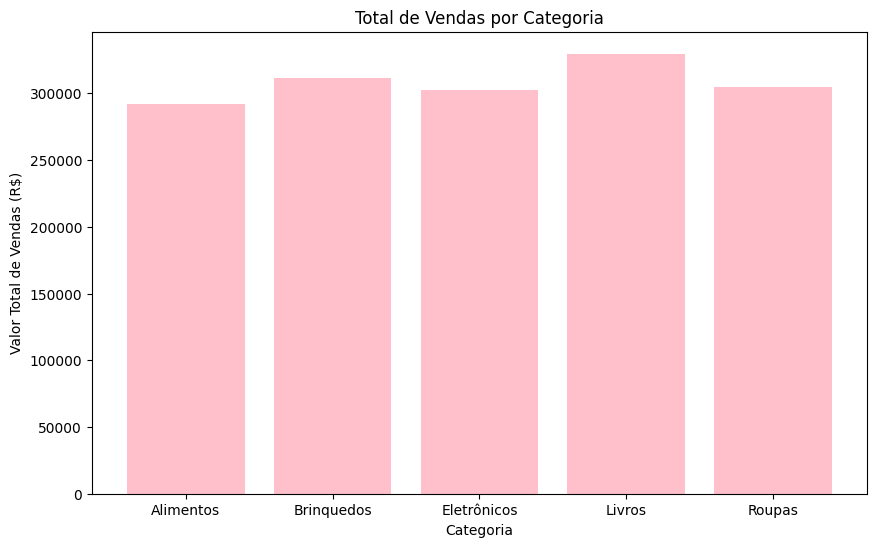

In [15]:
##Criar um gráfico de barras mostrando o total de vendas por categoria:

plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='pink')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

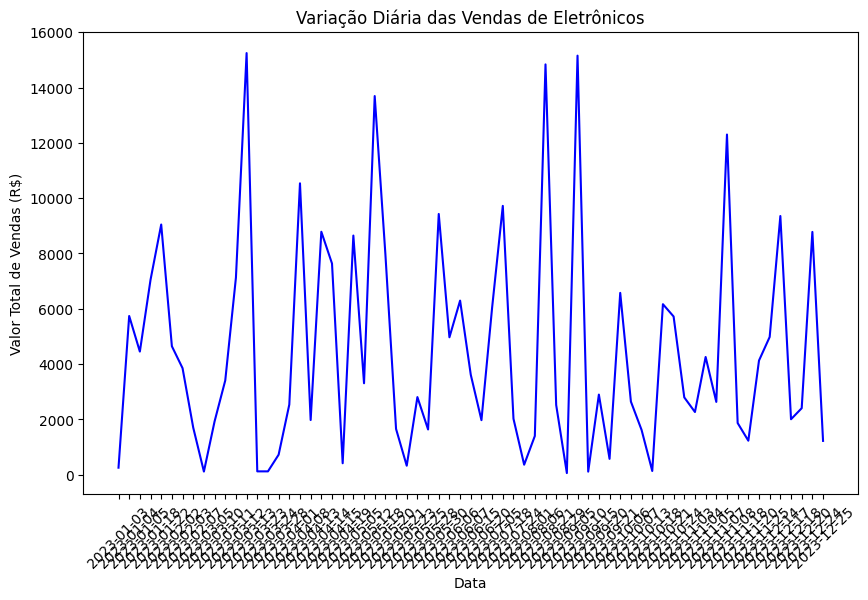

In [17]:
#**Pergunta 8: Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?**

#3. **Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**
#   ```python
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='blue')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

 **Pergunta 9: Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?**

Há uma variação nos eletronicos nos meses de fevereiro, março, julho e agosto, onde teve uma aumento no total das vendas.